## Titanic Dataset Exploration and Feature Engineering

### Data Loading and Initial Assessment
Imported the dataset from the Titanic CSV file and performed initial data checks, identifying null values in 'Age' and 'Cabin' columns.

### Null Value Imputation
Filled missing values in 'Age' using the mean, 'Fare' with the median, and 'Embarked' with the most common value ('S').

### Data Transformation and Refinement
Converted 'Age' to integer type and extracted titles from 'Name' using regular expressions. Merged and categorized certain titles to reduce categories, enhancing data quality.

### Feature Engineering
Derived 'Cabin_Exist' indicating the presence of cabin information. Grouped age and fare into quartiles ('Age_Group' and 'Fare_range'). Created a 'Family' feature by combining 'Parch' and 'SibSp'. Finally, performed feature selection by dropping irrelevant columns.

### Data Encoding
Encoded categorical data into binary form using one-hot encoding, improving its suitability for machine learning algorithms.

### Data Scaling
Applied MinMaxScaler to scale the dataset and normalize features for model training.

### Model Training and Evaluation
Trained a Logistic Regression model on the preprocessed data achieving 100% accuracy and an AUC score of 1.0.

This notebook explores the Titanic dataset, implements feature engineering techniques, and trains a model to predict survival using various passenger attributes.



In [63]:
import pandas as pd

In [64]:
titanic_df = pd.read_csv ("https://raw.githubusercontent.com/ismayilsiyad/educlaas/main/titanic.csv")

In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
## To check null values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are null values in Age column and Cabin column. We need to deal with null values

In [40]:
# Age, Fare, Embarked have null values so we are doing mean, median and alphabet imputation
titanic_df['Age'] = titanic_df.Age.fillna(titanic_df.Age.mean())
titanic_df['Fare'] = titanic_df.Fare.fillna(titanic_df.Fare.median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S') ## as it has high value count
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
## As age cannot be in float
titanic_df = titanic_df.astype({"Age": int})

In [42]:
## To check all the unique values in a dataset
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [43]:
# To check particular passenger had a cabin or not?
## here is null gives true wherever it finds nan value but we want true where it doesnot have nan values so we used tilt symbol
titanic_df['Cabin_Exist'] = ~titanic_df.Cabin.isnull()
## show data
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Exist
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q,False


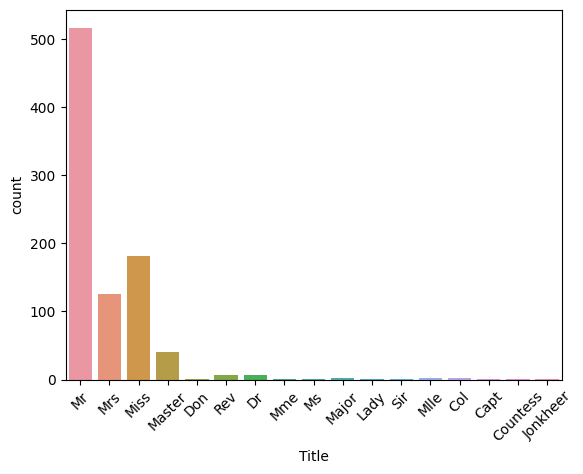

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
## This lamda re.seach will give the title of the names as we choose group1 out of it
titanic_df['Title'] = titanic_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

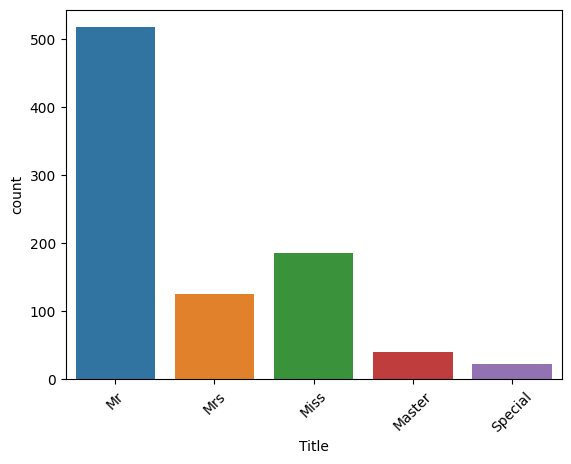

In [45]:
## we did this in order to know reduce the categories
titanic_df['Title'] = titanic_df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
titanic_df['Title'] = titanic_df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

In [46]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# grouping numerical columns
## q stands for quartile range for eg it will try to group data in 4 bins having 0-15%, 15-35%, 35-51%, 51-78% and 78-100%.
## It segregates data based on datapoints like its checks whether the datapoint lies in first 15% of the data, or next(15-35)15% of data
titanic_df['Age_Group'] = pd.qcut(titanic_df.Age, q=4, labels=False)
titanic_df['Fare_range']= pd.qcut(titanic_df.Fare, q=4, labels=False)
titanic_df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Exist,Title,Age_Group,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,Mr,2,1
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q,False,Mr,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,True,Mr,3,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,False,Master,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,False,Mrs,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,False,Mrs,0,2


In [48]:
## Now we will do feature selection
## we will remove coloumns that are unrelevant for us
titanic_df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Fare','Age'], axis=1, inplace=True)
titanic_df.head(6)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Exist,Title,Age_Group,Fare_range
0,0,3,male,1,0,S,False,Mr,0,0
1,1,1,female,1,0,C,True,Mrs,3,3
2,1,3,female,0,0,S,False,Miss,1,1
3,1,1,female,1,0,S,True,Mrs,2,3
4,0,3,male,0,0,S,False,Mr,2,1
5,0,3,male,0,0,Q,False,Mr,1,1


In [49]:
## Add a feature or column as we can observe Parch meaning parent and sibling meaqns child so we can create a column named Family merging 2 columns in 1
titanic_df['Family'] = titanic_df.Parch + titanic_df.SibSp
titanic_df.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Exist,Title,Age_Group,Fare_range,Family
0,0,3,male,1,0,S,False,Mr,0,0,1
1,1,1,female,1,0,C,True,Mrs,3,3,1
2,1,3,female,0,0,S,False,Miss,1,1,0
3,1,1,female,1,0,S,True,Mrs,2,3,1
4,0,3,male,0,0,S,False,Mr,2,1,0
5,0,3,male,0,0,Q,False,Mr,1,1,0
6,0,1,male,0,0,S,True,Mr,3,3,0
7,0,3,male,3,1,S,False,Master,0,2,4
8,1,3,female,0,2,S,False,Mrs,1,1,2
9,1,2,female,1,0,C,False,Mrs,0,2,1


In [50]:
## again we will drop the column
titanic_df =  titanic_df.drop(['SibSp','Parch'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Embarked,Cabin_Exist,Title,Age_Group,Fare_range,Family
0,0,3,male,S,False,Mr,0,0,1
1,1,1,female,C,True,Mrs,3,3,1
2,1,3,female,S,False,Miss,1,1,0
3,1,1,female,S,True,Mrs,2,3,1
4,0,3,male,S,False,Mr,2,1,0


In [51]:
## now we will convert categorical data into binary as it helps to get good relationship when training ML model
df_one_hot_encoding = pd.get_dummies(titanic_df,drop_first=True)
df_one_hot_encoding.head(6)

,Survived,Pclass,Cabin_Exist,Age_Group,Fare_range,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0,3,False,0,0,1,1,0,1,0,1,0,0
1,1,1,True,3,3,1,0,0,0,0,0,1,0
2,1,3,False,1,1,0,0,0,1,1,0,0,0
3,1,1,True,2,3,1,0,0,1,0,0,1,0
4,0,3,False,2,1,0,1,0,1,0,1,0,0
5,0,3,False,1,1,0,1,1,0,0,1,0,0


In [52]:
label = df_one_hot_encoding['Survived']
df_one_hot_encoding.drop(['Survived'], axis=1)
df_one_hot_encoding.head()

,Survived,Pclass,Cabin_Exist,Age_Group,Fare_range,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0,3,False,0,0,1,1,0,1,0,1,0,0
1,1,1,True,3,3,1,0,0,0,0,0,1,0
2,1,3,False,1,1,0,0,0,1,1,0,0,0
3,1,1,True,2,3,1,0,0,1,0,0,1,0
4,0,3,False,2,1,0,1,0,1,0,1,0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaling = MinMaxScaler()

In [55]:
new_list = list(df_one_hot_encoding.columns)
new_list

['Survived',
 'Pclass',
 'Cabin_Exist',
 'Age_Group',
 'Fare_range',
 'Family',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Special']

In [56]:
scaled = scaling.fit_transform(df_one_hot_encoding)
scaled = pd.DataFrame(scaled, columns=new_list)

In [57]:
print("Scaled Dataset Using MinMaxScaler")
scaled.head()

Scaled Dataset Using MinMaxScaler


,Survived,Pclass,Cabin_Exist,Age_Group,Fare_range,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0.0,1.0,0.0,0.000000,0.000000,0.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.000000,1.000000,0.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.333333,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.666667,1.000000,0.1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.666667,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled, label, test_size=0.30, random_state=0)
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [60]:
pred = model.predict( X_test)

In [61]:
import numpy as np
acc = np.average(pred == y_test)
print('Accuracy:', acc)

Accuracy: 1.0


In [62]:
from sklearn.metrics import roc_auc_score
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 1.0
